# Analysis of results from Buchi automata experiments - `random-all` and `from-ltl`
First, let us import some essential packages


In [1]:
%pwd
!git clone https://github.com/VeriFIT/ba-compl-eval
%cd ba-compl-eval/eval/results/results-2021-10-05-final

Cloning into 'ba-compl-eval'...
remote: Enumerating objects: 34849, done.
remote: Counting objects: 100% (34849/34849), done.
remote: Compressing objects: 100% (26553/26553), done.
remote: Total 34849 (delta 9074), reused 33940 (delta 8168), pack-reused 0
Receiving objects: 100% (34849/34849), 28.93 MiB | 7.65 MiB/s, done.
Resolving deltas: 100% (9074/9074), done.
Checking out files: 100% (59284/59284), done.
/content/ba-compl-eval/eval/results/results-2021-10-05-final


In [2]:
import datetime
import pandas as pd
import re as re
import tabulate as tab
import math

import evallib as el               # this contains auxiliary functionality for evaluation of experiments

And we define other useful auxiliary functions.

In [3]:
# Connect a DF with results to DF with classification of inputs
def connect_with_classification(df, clas_file):
    df_clas = el.read_file(clas_file)
    df = pd.merge(df, df_clas, on='name')
    return df


# prints results of classification
def print_classification(df):
    df_empty = df[df['empty'] == 1]
    df_deterministic = df[df['deterministic'] == 1]
    df_deterministic_weak = df[(df['deterministic'] == 1) & (df['weak'] == 1)]
    df_inherently_weak = df[df['inherently weak'] == 1]
    df_semi_deterministic = df[df['semi deterministic'] == 1]
    df_terminal = df[df['terminal'] == 1]
    df_unambiguous = df[df['unambiguous'] == 1]
    df_weak = df[df['weak'] == 1]
    df_very_weak = df[df['very weak'] == 1]
    df_elevator = df[df['elevator'] == 1]
    df_elevator_not_semi = df[(df['elevator'] == 1) & (df['semi deterministic'] == 0)]

    print(f"! Classification of input automata")
    print(f"!   # empty: {len(df_empty)}")
    print(f"!   # deterministic: {len(df_deterministic)}")
    print(f"!   # deterministic weak: {len(df_deterministic_weak)}")
    print(f"!   # inherently weak: {len(df_inherently_weak)}")
    print(f"!   # semi-deterministic: {len(df_semi_deterministic)}")
    print(f"!   # terminal: {len(df_terminal)}")
    print(f"!   # unambiguous: {len(df_unambiguous)}")
    print(f"!   # weak: {len(df_weak)}")
    print(f"!   # very weak: {len(df_very_weak)}")
    print(f"!   # elevator: {len(df_elevator)}")
    print(f"!   # elevator not semideterministic: {len(df_elevator_not_semi)}")


# remove too easy automata from processing
def filter_non_easy(df):
    # sanitization based on properties of input automata
    #df = df[df['semi deterministic'] == 1]
    df = df[df['semi deterministic'] == 0]
    df = df[df['inherently weak'] == 0]
    df = df[df['unambiguous'] == 0]
    return df

# computes summary statistics
def summary_stats(df):
  summary = dict()
  for col in df.columns:
      if re.search('-States$', col) or re.search('-runtime$', col):
          summary[col] = dict()
          summary[col]['max'] = df[col].max()
          summary[col]['min'] = df[col].min()
          summary[col]['mean'] = df[col].mean()
          summary[col]['median'] = df[col].median()
          summary[col]['std'] = df[col].std()
          summary[col]['timeouts'] = df[col].isna().sum()
  return pd.DataFrame(summary).transpose()


# table to LaTeX file
def table_to_file(table, headers, out_file):
    with open(f"plots/{out_file}.tex", mode='w') as fl:
        print(tab.tabulate(table, headers=headers, tablefmt="latex"), file=fl)

In [4]:
# load results
def load_results(filename):
    df = el.read_file(filename)

    print(f"! Loaded results")
    print(f"!   file:  {filename}")
    print(f"!   time:  {datetime.datetime.now()}")
    print(f"!   # of automata: {len(df)}")
    return df

Then, we set some parameters of the experiments (I know, it would be better if they were in the CSV file... it's on the TODO list).

In [5]:
# in seconds
TIMEOUT = 300
TIMEOUT_VAL = TIMEOUT * 1.1
TIME_MIN = 0.01

FILENAME_random="./random-all-to300-merged.csv"
CLASSIFICATION_random="./random-all-classification.csv"

FILENAME_ltl="./from_ltl_red-to300-ranker-preproc-copy-merged-merged.csv"
CLASSIFICATION_ltl="./from_ltl_classification.csv"


pd.set_option('display.max_columns', 500)

In [6]:
df_random = load_results(FILENAME_random)
df_ltl = load_results(FILENAME_ltl)

df_ltl = df_ltl.rename({'ranker-preproc-copyheur-nopost-States': 'ranker-nopost-States',
               'ranker-preproc-copyheur-nopost-Transitions': 'ranker-nopost-Transitions',
               'ranker-preproc-copyheur-autfilt-States': 'ranker-autfilt-States',
               'ranker-preproc-copyheur-runtime': 'ranker-runtime',
               }, axis='columns')

! Loaded results
!   file:  ./random-all-to300-merged.csv
!   time:  2021-10-15 11:20:10.084477
!   # of automata: 10938
! Loaded results
!   file:  ./from_ltl_red-to300-ranker-preproc-copy-merged-merged.csv
!   time:  2021-10-15 11:20:10.153270
!   # of automata: 1721


In [ ]:
list(df_ltl)

In [7]:
df_random['source'] = 'random-all'
df_ltl['source'] = 'from_ltl'

In [ ]:
df_random

In [ ]:
df_ltl

In [8]:
df_random = connect_with_classification(df_random, CLASSIFICATION_random)
print_classification(df_random)
df_ltl = connect_with_classification(df_ltl, CLASSIFICATION_ltl)
print_classification(df_ltl)

! Classification of input automata
!   # empty: 0
!   # deterministic: 7026
!   # deterministic weak: 7015
!   # inherently weak: 8311
!   # semi-deterministic: 7100
!   # terminal: 6915
!   # unambiguous: 7116
!   # weak: 7460
!   # very weak: 6930
!   # elevator: 7181
!   # elevator not semideterministic: 81
! Classification of input automata
!   # empty: 0
!   # deterministic: 555
!   # deterministic weak: 451
!   # inherently weak: 948
!   # semi-deterministic: 1163
!   # terminal: 208
!   # unambiguous: 610
!   # weak: 947
!   # very weak: 777
!   # elevator: 1540
!   # elevator not semideterministic: 377


We should now remove easy automata from the data set

In [9]:
df_random = filter_non_easy(df_random)
print(f'! # of automata from random-all after sanitization: {len(df_random)}')
df_ltl = filter_non_easy(df_ltl)
print(f'! # of automata from df_ltl after sanitization: {len(df_ltl)}')
df_all = pd.concat([df_random, df_ltl])
print(f'! # of automata from df_all after sanitization: {len(df_all)}')

! # of automata from random-all after sanitization: 2592
! # of automata from df_ltl after sanitization: 414
! # of automata from df_all after sanitization: 3006


In [ ]:
list(df.columns)

Let us now compute some summary statistics

In [10]:
df_summary_random = summary_stats(df_random)
df_summary_ltl = summary_stats(df_ltl)
df_summary_all = summary_stats(df_all)


################  states of complements ##################
interesting = ["ranker-maxr-nopost",
               "ranker-rrestr-nopost",
               "schewe",
               "ranker-maxr-autfilt",
               "ranker-maxr-bo-autfilt",
               "piterman-autfilt",
               "safra-autfilt",
               "spot-autfilt",
               "fribourg-autfilt",
               "ltl2dstar-autfilt",
               "seminator-autfilt",
               "roll-autfilt",
               "ranker-autfilt",
               "ranker-nopost",
              ]

df_summary_random.loc[[x + '-States' for x in interesting]]

,max,min,mean,median,std,timeouts
ranker-maxr-nopost-States,319119.0,5.0,8687.722670,197.0,29076.871000,360.0
ranker-rrestr-nopost-States,330608.0,5.0,9841.045177,221.5,32607.103589,954.0
schewe-States,67780.0,7.0,5495.314303,774.5,10824.709389,928.0
ranker-maxr-autfilt-States,1239.0,1.0,56.405018,29.0,99.985718,360.0
ranker-maxr-bo-autfilt-States,1706.0,1.0,68.035728,29.0,123.335725,17.0
piterman-autfilt-States,1322.0,1.0,81.559690,34.0,138.565858,12.0
safra-autfilt-States,1648.0,1.0,91.186524,35.0,165.278063,158.0
spot-autfilt-States,2028.0,1.0,84.928267,32.0,153.828791,13.0
fribourg-autfilt-States,2779.0,1.0,104.259156,31.0,215.142182,80.0
ltl2dstar-autfilt-States,1850.0,1.0,81.738830,34.5,140.242886,130.0


In [11]:
df_summary_ltl.loc[[x + '-States' for x in interesting]]

,max,min,mean,median,std,timeouts
ranker-maxr-nopost-States,43527.0,4.0,357.713936,29.0,2510.305766,5.0
ranker-rrestr-nopost-States,214946.0,4.0,1948.264484,33.0,13927.972498,17.0
schewe-States,33345.0,5.0,665.271605,35.0,3081.887357,9.0
ranker-maxr-autfilt-States,330.0,2.0,20.068460,10.0,32.857837,5.0
ranker-maxr-bo-autfilt-States,440.0,2.0,21.094660,11.0,38.278443,2.0
piterman-autfilt-States,436.0,3.0,21.978155,14.5,30.658499,2.0
safra-autfilt-States,361.0,3.0,30.385000,17.0,44.240137,14.0
spot-autfilt-States,151.0,2.0,14.519324,10.0,17.713304,0.0
fribourg-autfilt-States,212.0,2.0,12.847458,9.0,16.215583,1.0
ltl2dstar-autfilt-States,223.0,2.0,21.051471,13.0,24.168325,6.0


In [12]:
df_summary_all.loc[[x + '-States' for x in interesting]]

,max,min,mean,median,std,timeouts
ranker-maxr-nopost-States,319119.0,4.0,7397.691026,141.0,26917.292093,365.0
ranker-rrestr-nopost-States,330608.0,4.0,8301.274201,150.0,30054.216296,971.0
schewe-States,67780.0,5.0,4549.849203,439.0,9987.831184,937.0
ranker-maxr-autfilt-States,1239.0,1.0,50.777736,24.0,93.744718,365.0
ranker-maxr-bo-autfilt-States,1706.0,1.0,61.561098,24.0,116.518688,19.0
piterman-autfilt-States,1322.0,1.0,73.355281,28.0,130.791873,14.0
safra-autfilt-States,1648.0,1.0,82.604799,29.0,155.511526,172.0
spot-autfilt-States,2028.0,1.0,75.189108,24.0,144.994520,13.0
fribourg-autfilt-States,2779.0,1.0,91.352137,23.0,201.987955,81.0
ltl2dstar-autfilt-States,1850.0,1.0,73.111498,28.0,131.921312,136.0


Let us now evaluate the runtime

In [13]:
interesting = [x for x in interesting if not 'nopost' in x]
interesting = [x.replace('-autfilt', '') for x in interesting]
df_summary_random.loc[[x + '-runtime' for x in interesting]]

,max,min,mean,median,std,timeouts
schewe-runtime,426.30,2.88,24.277764,7.390,48.115537,928.0
ranker-maxr-runtime,280.26,0.01,10.726022,1.045,28.142584,360.0
ranker-maxr-bo-runtime,191.77,0.01,9.663371,3.620,16.010756,17.0
piterman-runtime,185.00,3.24,7.388640,6.040,8.143274,12.0
safra-runtime,675.17,3.15,15.048981,6.925,35.428728,158.0
spot-runtime,182.46,0.00,0.991981,0.020,8.593568,13.0
fribourg-runtime,315.98,3.15,19.526441,10.150,32.450684,80.0
ltl2dstar-runtime,297.82,0.00,3.839139,0.050,21.313276,129.0
seminator-runtime,292.51,0.01,11.252004,0.390,34.259559,362.0
roll-runtime,351.24,0.45,37.850013,12.235,63.962925,1106.0


In [14]:
df_summary_ltl.loc[[x + '-runtime' for x in interesting]]

,max,min,mean,median,std,timeouts
schewe-runtime,122.68,3.15,7.801407,5.210,10.783341,9.0
ranker-maxr-runtime,219.63,0.01,1.988020,0.040,16.514186,5.0
ranker-maxr-bo-runtime,160.59,0.01,1.266845,0.050,8.623174,2.0
piterman-runtime,46.84,3.24,6.645801,5.620,3.731826,2.0
safra-runtime,196.89,3.45,8.372575,5.795,13.448151,14.0
spot-runtime,13.77,0.00,0.062778,0.020,0.712322,0.0
fribourg-runtime,259.89,3.55,7.223826,5.480,13.222562,1.0
ltl2dstar-runtime,15.34,0.00,0.114289,0.020,0.894086,6.0
seminator-runtime,16.75,0.00,0.077215,0.020,0.826650,1.0
roll-runtime,217.95,0.60,7.279197,2.740,16.055372,3.0


In [15]:
df_summary_all.loc[[x + '-runtime' for x in interesting]]

,max,min,mean,median,std,timeouts
schewe-runtime,426.30,2.88,21.052571,6.570,43.899727,937.0
ranker-maxr-runtime,280.26,0.01,9.372806,0.610,26.859796,365.0
ranker-maxr-bo-runtime,191.77,0.01,8.505229,1.890,15.478872,19.0
piterman-runtime,185.00,3.24,7.286350,5.990,7.691408,14.0
safra-runtime,675.17,3.15,14.106651,6.705,33.299348,172.0
spot-runtime,182.46,0.00,0.863451,0.020,7.987736,13.0
fribourg-runtime,315.98,3.15,17.789354,9.250,30.778302,81.0
ltl2dstar-runtime,297.82,0.00,3.309798,0.040,19.785957,135.0
seminator-runtime,292.51,0.00,9.505812,0.220,31.730391,363.0
roll-runtime,351.24,0.45,31.226605,8.190,58.470719,1109.0


Let us now sanitize timeouts and other fishy values in order to have better plots.

In [16]:
states_min = 1

def sanitize_results(df, df_summary_states):
  # min and max states
  states_max = df_summary_states['max'].max()
  states_timeout = states_max * 1.1
 
  # sanitizing NAs
  for col in df.columns:
      if re.search('-States$', col):
          df[col].fillna(states_timeout, inplace=True)
          df[col].replace(0, states_min, inplace=True)  # to remove 0 (in case of log graph)

      if re.search('-runtime$', col):
          df[col].fillna(TIMEOUT_VAL, inplace=True)
          df.loc[df[col] < TIME_MIN, col] = TIME_MIN  # to remove 0 (in case of log graph)
  
  return df

df_random = sanitize_results(df_random, df_summary_random)
df_ltl = sanitize_results(df_ltl, df_summary_ltl)
        
############# the best solution out of other tools ##########
df_random['other_min-States'] = df_random[['safra-autfilt-States',
                             'piterman-autfilt-States',
                             'spot-autfilt-States',
                             'fribourg-autfilt-States',
                             'ltl2dstar-autfilt-States',
                             'seminator-autfilt-States',
                             'roll-autfilt-States']].min(axis=1)
df_ltl['other_min-States'] = df_ltl[['safra-autfilt-States',
                             'piterman-autfilt-States',
                             'spot-autfilt-States',
                             'fribourg-autfilt-States',
                             'ltl2dstar-autfilt-States',
                             'seminator-autfilt-States',
                             'roll-autfilt-States']].min(axis=1)

And let's draw some scatter plots!

In [17]:
import mizani.formatters as mizani
import plotnine as p9

def scatter_plot2(df1, df2, xcol, ycol, domain, color1='black', color2='red', xname=None, yname=None, log=False, width=6, height=6, clamp=True, tickCount=5):
    assert len(domain) == 2

    POINT_SIZE = 1.5
    DASH_PATTERN = (0, (6, 2))

    if xname is None:
        xname = xcol
    if yname is None:
        yname = ycol

    # formatter for axes' labels
    ax_formatter = mizani.custom_format('{:n}')

    if clamp:  # clamp overflowing values if required
        df1 = df1.copy(deep=True)
        df1.loc[df1[xcol] > domain[1], xcol] = domain[1]
        df1.loc[df1[ycol] > domain[1], ycol] = domain[1]

        df2 = df2.copy(deep=True)
        df2.loc[df2[xcol] > domain[1], xcol] = domain[1]
        df2.loc[df2[ycol] > domain[1], ycol] = domain[1]

    # generate scatter plot
    scatter = p9.ggplot(df1)
    scatter += p9.aes(x=xcol, y=ycol)
    scatter += p9.geom_point(size=POINT_SIZE, na_rm=True, color=color1, alpha=0.5)
    scatter += p9.geom_point(size=POINT_SIZE, na_rm=True, data=df2, color=color2, alpha=0.5)
    scatter += p9.labs(x=xname, y=yname)

    # rug plots
    scatter += p9.geom_rug(na_rm=True, sides="tr", color=color1, alpha=0.05)
    scatter += p9.geom_rug(na_rm=True, sides="tr", data=df2, color=color2, alpha=0.05)

    if log:  # log scale
        scatter += p9.scale_x_log10(limits=domain, labels=ax_formatter)
        scatter += p9.scale_y_log10(limits=domain, labels=ax_formatter)
    else:
        scatter += p9.scale_x_continuous(limits=domain, labels=ax_formatter)
        scatter += p9.scale_y_continuous(limits=domain, labels=ax_formatter)

    # scatter += p9.theme_xkcd()
    scatter += p9.theme_bw()
    scatter += p9.theme(panel_grid_major=p9.element_line(color='#666666', alpha=0.5))
    scatter += p9.theme(panel_grid_minor=p9.element_blank())
    scatter += p9.theme(figure_size=(width, height))
    scatter += p9.theme(text=p9.element_text(size=24, color="black"))

    # generate additional lines
    scatter += p9.geom_abline(intercept=0, slope=1, linetype=DASH_PATTERN)  # diagonal
    scatter += p9.geom_vline(xintercept=domain[1], linetype=DASH_PATTERN)  # vertical rule
    scatter += p9.geom_hline(yintercept=domain[1], linetype=DASH_PATTERN)  # horizontal rule

    res = scatter

    return res

def scatplot2(df1, df2, params, color1='blue', color2='red', save=False):
    size = 8
    if 'xname' not in params:
        params['xname'] = None
    if 'yname' not in params:
        params['yname'] = None
    if 'max' not in params:
        params['max'] = 10000
    if 'min' not in params:
        params['min'] = 1
    if 'tickCount' not in params:
        params['tickCount'] = 5
    if 'filename' not in params:
        params['filename'] = "fig_" + params['x'] + "_vs_" + params['y'] + ".pdf"

    pl = scatter_plot2(df1, df2,
                         xcol=params['x'] + '-States',
                         ycol=params['y'] + '-States',
                         xname=params['xname'], yname=params['yname'],
                         domain=[params['min'], params['max']],
                         tickCount=params['tickCount'],
                         color1=color1, color2=color2,
                         log=True, width=size, height=size)
    
    if save:
      pl.save(filename=params['filename'],
              dpi=1000)

    return pl

In [ ]:
def scatplot(df, params):
    size = 8
    if 'xname' not in params:
        params['xname'] = None
    if 'yname' not in params:
        params['yname'] = None
    if 'max' not in params:
        params['max'] = 10000
    if 'tickCount' not in params:
        params['tickCount'] = 5
    if 'filename' not in params:
        params['filename'] = "fig_" + params['x'] + "_vs_" + params['y']

    pl = el.scatter_plot(df,
                         xcol=params['x'] + '-States',
                         ycol=params['y'] + '-States',
                         xname=params['xname'], yname=params['yname'],
                         domain=[states_min, params['max']],
                         tickCount=params['tickCount'],
                         log=True, width=size, height=size)
    return pl

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: fig_ranker-nopost_vs_schewe.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


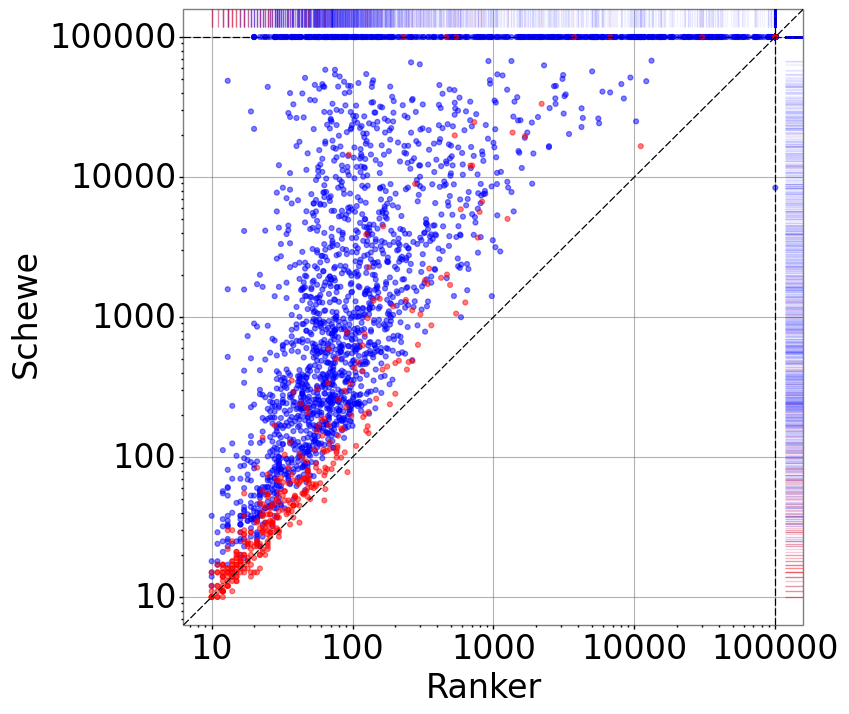

<ggplot: (8731220091153)>

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: fig_ranker-nopost_vs_ranker-maxr-nopost.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


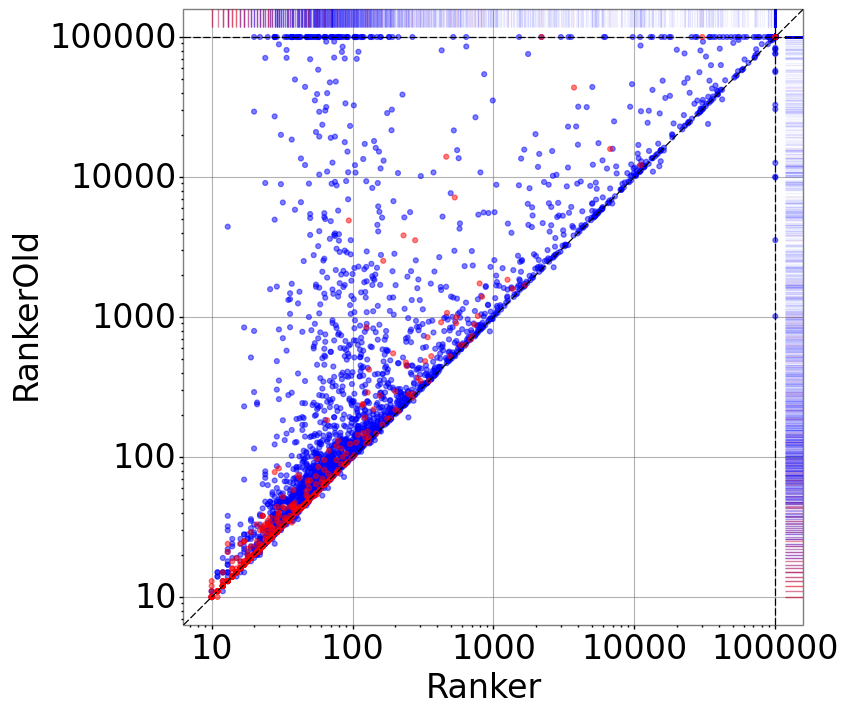

<ggplot: (8731220113149)>

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: fig_ranker-autfilt_vs_spot-autfilt.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


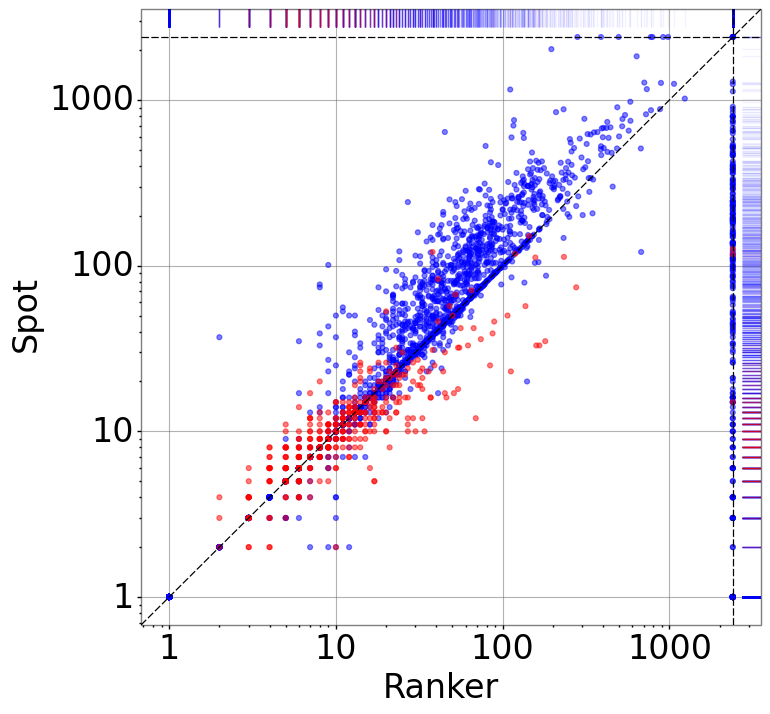

<ggplot: (8731220091573)>

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 8 x 8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: fig_ranker-autfilt_vs_roll-autfilt.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


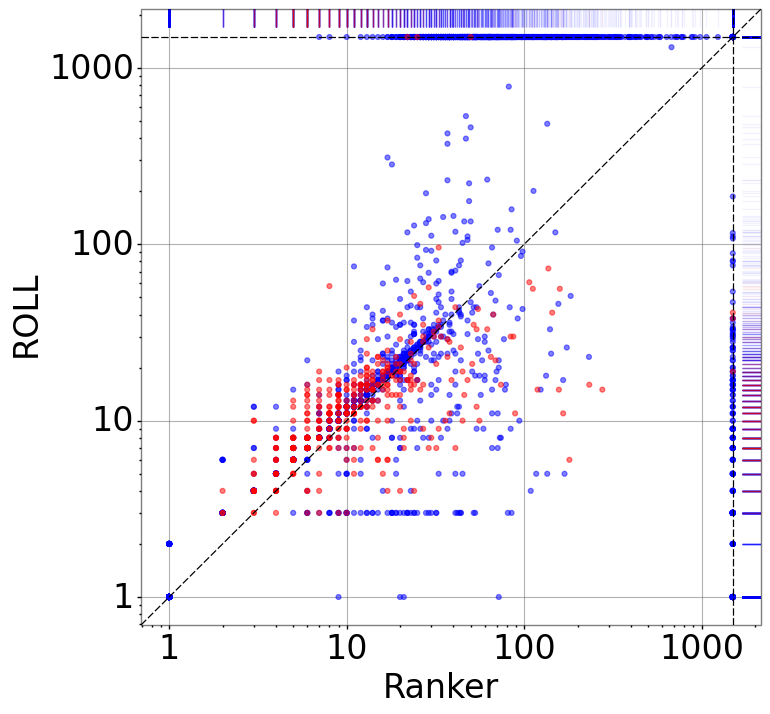

<ggplot: (8731220082061)>

In [18]:
# compare selected method with all other
method = "ranker"
method_autfilt = method + "-autfilt"
save=False

if False:
  display(scatplot2(df_random, df_ltl, {'x': method_autfilt, 'y': "schewe-autfilt"}, save=save))
  display(scatplot2(df_random, df_ltl, {'x': method_autfilt, 'y': "piterman-autfilt"}, save=save))
  display(scatplot2(df_random, df_ltl, {'x': method_autfilt, 'y': "fribourg-autfilt"}, save=save))
  display(scatplot2(df_random, df_ltl, {'x': method_autfilt, 'y': "roll-autfilt"}, save=save))
  display(scatplot2(df_random, df_ltl, {'x': method_autfilt, 'y': "ltl2dstar-autfilt"}, save=save))
  display(scatplot2(df_random, df_ltl, {'x': method_autfilt, 'y': "spot-autfilt"}, save=save))
  display(scatplot2(df_random, df_ltl, {'x': method_autfilt, 'y': "safra-autfilt"}, save=save))
  display(scatplot2(df_random, df_ltl, {'x': method_autfilt, 'y': "seminator-autfilt"}, save=save))
  display(scatplot2(df_random, df_ltl, {'x': method_autfilt, 'y': "ranker-maxr-autfilt"}, save=save))


display(scatplot2(df_random, df_ltl,
                  {'x': method +'-nopost', 'y': "schewe",
                   'min': 10, 'max': 100000,
                   'xname': 'Ranker', 'yname': 'Schewe'},
                  save=True))
display(scatplot2(df_random, df_ltl,
                  {'x': method +'-nopost', 'y': "ranker-maxr-nopost",
                   'min': 10, 'max': 100000,
                   'xname': 'Ranker', 'yname': 'RankerOld'},
                  save=True))
display(scatplot2(df_random, df_ltl,
                  {'x': method_autfilt, 'y': "spot-autfilt",
                  'min': 1, 'max': 2400,
                  'xname': 'Ranker', 'yname': 'Spot'},
                  save=True))
display(scatplot2(df_random, df_ltl,
                  {'x': method_autfilt, 'y': "roll-autfilt",
                  'min': 1, 'max': 1500,
                  'xname': 'Ranker', 'yname': 'ROLL'},
                  save=True))

In [32]:
# comparing wins/loses
def compute_wins(df, method):
  all_methods = ["ranker",
                 "piterman",
                 "schewe",
                 "safra",
                 "spot",
                 "fribourg",
                 "ltl2dstar",
                 "seminator",
                 "roll",
                 "ranker-maxr",
                ]
  suffix = "-autfilt-States"
  method_suf = method + suffix
  all_methods_suf = [m + suffix for m in all_methods]

  states_timeout = df[all_methods_suf].max().max()

  compare_methods = []
  for m in all_methods_suf:
    if (m != method_suf):
      compare_methods += [(method_suf, m)]

  compare_methods.append(("ranker-nopost-States", "ranker-maxr-nopost-States"))
  compare_methods.append(("ranker-nopost-States", "schewe-States"))

  dict_wins = {}
  for left, right in compare_methods:
        left_over_right = df[df[left] < df[right]]
        right_timeouts = left_over_right[left_over_right[right] == states_timeout]

        right_over_left = df[df[left] > df[right]]
        left_timeouts = right_over_left[right_over_left[left] == states_timeout]

        dict_wins[right] = {'wins': len(left_over_right),                            
                            'winsTO': len(right_timeouts),                            
                            'losses': len(right_over_left),                            
                            'lossesTO': len(left_timeouts),                            
                           }
  return dict_wins

def print_win_table(df, method):
  dict_wins = compute_wins(df, 'ranker')
  tab_wins = []
  for key, val in dict_wins.items():
    tab_wins.append([key, val['wins'], val['winsTO'], val['losses'], val['lossesTO']])
  headers_wins = ["method", "wins", "wins-timeouts", "losses", "losses-timeouts"]
  #table_to_file(tab_wins, headers_wins, out_prefix + "_table1right")
  print(tab.tabulate(tab_wins, headers=headers_wins, tablefmt="github"))


print("######################################################################")
print("####                        Table 1 (right)                       ####")
print("######################################################################")
print_win_table(df_random, 'ranker')
print_win_table(df_ltl, 'ranker')
print("\n\n")

######################################################################
####                        Table 1 (right)                       ####
######################################################################
| method                     |   wins |   wins-timeouts |   losses |   losses-timeouts |
|----------------------------|--------|-----------------|----------|-------------------|
| piterman-autfilt-States    |   1124 |               2 |      360 |               266 |
| schewe-autfilt-States      |   1368 |             653 |       76 |                 1 |
| safra-autfilt-States       |   1211 |             119 |      350 |               237 |
| spot-autfilt-States        |    936 |               7 |      501 |               270 |
| fribourg-autfilt-States    |   1055 |              57 |      376 |               253 |
| ltl2dstar-autfilt-States   |   1195 |             102 |      383 |               248 |
| seminator-autfilt-States   |   1131 |             262 |      367 |       

In [42]:
# print the table

methods = [("ranker-nopost-States", "\\rowcolor{GreenYellow}\\ranker"),
           ("ranker-maxr-nopost-States", "$\\rankerold$"),
           ("schewe-States", "\\algschewe~\\goalmark"),
           ("ranker-autfilt-States", "\\rowcolor{GreenYellow}\\ranker"),
#           ("ranker-maxr-autfilt-States", "$\\rankerold$"),
#           ("schewe-autfilt-States", "\\algschewe~\\goalmark"),
           ("piterman-autfilt-States", "\\piterman~\\goalmark"),
           ("safra-autfilt-States", "\\safra~\\goalmark"),
           ("spot-autfilt-States", "\\spot"),
           ("fribourg-autfilt-States", "\\fribourg~\\goalmark"),
           ("ltl2dstar-autfilt-States", "\\ltldstar"),
           ("seminator-autfilt-States", "\\seminator"),
           ("roll-autfilt-States", "\\roll"),
          ]

df1=df_random
df2=df_ltl
df_summary1 = df_summary_random
df_summary2 = df_summary_ltl
df_summary12 = df_summary_all

our_method = "ranker"

dict_wins1 = compute_wins(df1, our_method)
dict_wins2 = compute_wins(df2, our_method)

#hdr = lambda x: f"\\textbf\{{x}\}"
hdr = lambda x: "\\textbf{" + x + "}"
hdr_multicol = lambda x, y: "\\multicolumn{" + str(y) + "}{c}{" + hdr(x) + "}"

headers = [hdr_multicol("method",1),
           hdr_multicol("mean", 4),
           hdr_multicol("median", 4),
           hdr_multicol("wins", 4),
           hdr_multicol("losses", 4),
           hdr_multicol("mean runtime", 4),
           hdr_multicol("median runtime", 4),
           hdr_multicol("timeouts", 4),
          ]

divider = "\\!:\\!"
table_res = []
for m, m_print in methods:
  row = []
  row += [m_print]

  mean_of = lambda x: x.loc[m]['mean']
  row += ["{:.0f}".format(mean_of(df_summary12))]
  row += [" (" + "{:.0f}".format(mean_of(df_summary1)), divider,
          "{:.0f}".format(mean_of(df_summary2)) + ")"]

  median_of = lambda x: x.loc[m]['median']
  row += ["{:.0f}".format(median_of(df_summary12))]
  row += [" (" + "{:.0f}".format(median_of(df_summary1)), divider,
          "{:.0f}".format(median_of(df_summary2)) + ")"]


  if m in dict_wins1:
    row += [str(dict_wins1[m]['wins'] + dict_wins2[m]['wins'])]
    row += [" (" + str(dict_wins1[m]['wins']), divider,
            str(dict_wins2[m]['wins']) + ")"]

    row += [str(dict_wins1[m]['losses'] + dict_wins2[m]['losses'])]
    row += [" (" + str(dict_wins1[m]['losses']), divider,
            str(dict_wins2[m]['losses']) + ")"]
  else:
    row += [""] * 8

  m_runtime = m
  m_runtime = m_runtime.replace("-States", "-runtime")
  m_runtime = m_runtime.replace("-nopost", "")
  m_runtime = m_runtime.replace("-autfilt", "")

  mean_of = lambda x: x.loc[m_runtime]['mean']
  row += ["{:.2f}".format(mean_of(df_summary12))]
  row += [" (" + "{:.2f}".format(mean_of(df_summary1)), divider,
          "{:.2f}".format(mean_of(df_summary2)) + ")"]

  median_of = lambda x: x.loc[m_runtime]['median']
  row += ["{:.2f}".format(median_of(df_summary12))]
  row += [" (" + "{:.2f}".format(median_of(df_summary1)), divider,
          "{:.2f}".format(median_of(df_summary2)) + ")"]

  to_of = lambda x: x.loc[m]['timeouts']
  row += ["{:.0f}".format(to_of(df_summary12))]
  row += [" (" + "{:.0f}".format(to_of(df_summary1)), divider,
          "{:.0f}".format(to_of(df_summary2)) + ")"]

  table_res.append(row)

#print(tab.tabulate(table_res, headers=headers, tablefmt='github'))
print(tab.tabulate(table_res, headers=headers, tablefmt='latex_raw'))


\begin{tabular}{lrlllrlllllllllllrlllrlllrlll}
\hline
                               &      &       &       &      &     &      &       &     &      &       &       &      &     &      &       &      &       &        &       &       &   \multicolumn{1}{c}{\textbf{method}} & \multicolumn{4}{c}{\textbf{mean}}   & \multicolumn{4}{c}{\textbf{median}}   & \multicolumn{4}{c}{\textbf{wins}}   &   \multicolumn{4}{c}{\textbf{losses}} & \multicolumn{4}{c}{\textbf{mean runtime}}   & \multicolumn{4}{c}{\textbf{median runtime}}   & \multicolumn{4}{c}{\textbf{timeouts}}   \\
\hline
 \rowcolor{GreenYellow}\ranker & 3812 & (4452 & \!:\! & 207) &  79 & (93  & \!:\! & 26) &      &       &       &      &     &      &       &      &  7.83 & (8.99  & \!:\! & 1.30) &                                  0.51 & (0.84                               & \!:\!                                 & 0.04)                               &                                   279 & (276                                        & \!

# OLD TEXT

In [ ]:
# generate evaluation
def gen_evaluation(file_input, file_classification, out_prefix):
   

    # headers = ["name", "min", "max", "mean", "median", "std. dev", "timeouts"]
    headers = ["method", "max", "mean", "median", "std. dev", "timeouts"]
    print("######################################################################")
    print("####                        Table 1 (left)                        ####")
    print("######################################################################")
    print(tab.tabulate(tab_interesting, headers=headers, tablefmt="github"))
    table_to_file(tab_interesting, headers, out_prefix + "_table1left")
    print("\n\n")

   
    headers = ["method", "mean", "median", "std. dev"]
    # headers = ["method", "min", "max", "mean", "median", "std. dev", "timeouts"]
    print("######################################################################")
    print("####                           Table 2                            ####")
    print("######################################################################")
    print(tab.tabulate(tab_interesting, headers=headers, tablefmt="github"))
    table_to_file(tab_interesting, headers, out_prefix + "_table2")
    print("\n\n")

    # comparing wins/loses
    compare_methods = [("ranker-maxr-nopost-States", "ranker-rrestr-nopost-States"),
                       ("ranker-maxr-nopost-States", "schewe-States"),
                       ("ranker-preproc-portfolio-autfilt-States", "piterman-autfilt-States"),
                       ("ranker-preproc-portfolio-autfilt-States", "safra-autfilt-States"),
                       ("ranker-preproc-portfolio-autfilt-States", "spot-autfilt-States"),
                       ("ranker-preproc-portfolio-autfilt-States", "fribourg-autfilt-States"),
                       ("ranker-preproc-portfolio-autfilt-States", "ltl2dstar-autfilt-States"),
                       ("ranker-preproc-portfolio-autfilt-States", "seminator-autfilt-States"),
                       ("ranker-preproc-portfolio-autfilt-States", "roll-autfilt-States"),

                      ]
 #   compare_methods = [("ranker-maxr-nopost-States", "ranker-rrestr-nopost-States"),
 #                      ("ranker-maxr-nopost-States", "schewe-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "piterman-autfilt-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "safra-autfilt-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "spot-autfilt-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "fribourg-autfilt-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "ltl2dstar-autfilt-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "seminator-autfilt-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "roll-autfilt-States"),
 #                      ]

    tab_wins = []
    for left, right in compare_methods  :
        left_over_right = df[df[left] < df[right]]
        right_timeouts = left_over_right[left_over_right[right] == states_timeout]

        right_over_left = df[df[left] > df[right]]
        left_timeouts = right_over_left[right_over_left[left] == states_timeout]

        tab_wins.append([right, len(left_over_right), len(right_timeouts), len(right_over_left), len(left_timeouts)])

    headers_wins = ["method", "wins", "wins-timeouts", "loses", "loses-timeouts"]
    print("######################################################################")
    print("####                        Table 1 (right)                       ####")
    print("######################################################################")
    print(tab.tabulate(tab_wins, headers=headers_wins, tablefmt="github"))
    table_to_file(tab_wins, headers_wins, out_prefix + "_table1right")
    print("\n\n")

    print("##############    other claimed results    ###############")

    ############# the best solution ##########
    df['other_min-States'] = df[
        ['safra-autfilt-States', 'piterman-autfilt-States',
         'spot-autfilt-States', 'fribourg-autfilt-States',
         'ltl2dstar-autfilt-States','seminator-autfilt-States',
         'roll-autfilt-States']].min(axis=1)

    ranker_best = df[df['ranker-maxr-autfilt-States'] < df['other_min-States']]
    ranker_not_best = df[df['ranker-maxr-autfilt-States'] > df['other_min-States']]

    num_ranker_not_strictly_best = len(df) - len(ranker_not_best)
    num_ranker_not_strictly_best_percent = "{:.1f}".format(num_ranker_not_strictly_best / len(df) * 100)
    num_ranker_strictly_best = len(ranker_best)
    num_ranker_strictly_best_percent = "{:.1f}".format(num_ranker_strictly_best / len(df) * 100)
    print(f"ranker non-strictly best: {num_ranker_not_strictly_best} (= {num_ranker_not_strictly_best_percent} %)")
    print(f"ranker stricly best: {num_ranker_strictly_best} (= {num_ranker_strictly_best_percent} %)")
    # print(f"ranker not best = {len(ranker_not_best)}")

    ###########   BackOff   ################
    backoff = df[df["ranker-maxr-bo-Engine"].str.contains("GOAL", na=False)]
    print(f"backoff executions: {len(backoff)}")

    to_cmp2 = [{'x': "ranker-maxr-nopost", 'y': "ranker-rrestr-nopost",
                'xname': 'Ranker-MaxR', 'yname': 'Ranker-RRestr'},
               {'x': "ranker-maxr-nopost", 'y': "schewe",
                'xname': "Ranker-MaxR", 'yname': "Schewe-RedAvgOut"},
               {'x': "ranker-maxr-autfilt", 'y': "seminator-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "Seminator 2+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "piterman-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "Piterman+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "fribourg-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "Fribourg+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "roll-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "ROLL+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "ltl2dstar-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "ltl2dstar+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "spot-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "Spot+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "safra-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "Safra+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "safra-autfilt", 'y': "spot-autfilt",
                'max': 10000, 'tickCount': 3},
               {'x': "piterman-autfilt", 'y': "spot-autfilt",
                'max': 10000, 'tickCount': 3},
               {'x': "piterman-autfilt", 'y': "ltl2dstar-autfilt",
                'max': 10000, 'tickCount': 3},
               {'x': "piterman-autfilt", 'y': "seminator-autfilt",
                'max': 10000, 'tickCount': 3},
      #         {'x': "piterman-gff-autfilt", 'y': "seminator-autfilt",
      #          'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "other_min",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "ranker-maxr-delayopt-autfilt",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "ranker-maxr-delayopt-new-autfilt",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-delayopt-autfilt", 'y': "ranker-maxr-delayopt-new-autfilt",
                'max': 10000, 'tickCount': 3},
              ]

    # add fields where not present
    for params in to_cmp2:
        if 'xname' not in params:
            params['xname'] = None
        if 'yname' not in params:
            params['yname'] = None
        if 'max' not in params:
            params['max'] = states_timeout
        if 'tickCount' not in params:
            params['tickCount'] = 5
        if 'filename' not in params:
            params['filename'] = "fig_" + params['x'] + "_vs_" + params['y']

    size = 8
    plot_list = [(params['x'],
                  params['y'],
                  params['filename'],
                  el.scatter_plot(df,
                               xcol=params['x'] + '-States',
                               ycol=params['y'] + '-States',
                               xname=params['xname'], yname=params['yname'],
                               domain=[states_min, params['max']],
                               tickCount=params['tickCount'],
                               log=True, width=size, height=size)) for params
                 in to_cmp2]

    print("\n\n")
    print("Generating plots...")
    for x, y, filename, plot in plot_list:
        filename = f"plots/{out_prefix}_{filename}.pdf"
        print(f"plotting x: {x}, y: {y}... saving to {filename}")
        # plot.save(filename, scale_factor=2)
        plot.save(filename=filename, dpi=1000)
        print(plot)

    # return benchmarks solvable only by 'engine'
    def only_solves(df, engine):
        # select those where engine finishes
        res = df[df[engine + '-States'] != states_timeout]
        for col in res.columns:
            if re.search('-States$', col) and not re.search(engine, col):
                res = res[res[col] == states_timeout]

        return res


    engines = ["ranker-maxr",
               "ranker-rrestr",
               "ranker-maxr-bo",
               "piterman",
               "safra",
               "spot",
               "fribourg",
               "ltl2dstar",
               "seminator",
               "roll",
              ]

    for i in engines:
        i_only_solves = only_solves(df, i)
        print(f"only {i} = " + str(len(i_only_solves)))
        if len(i_only_solves) > 0:
            print()
            print(tab.tabulate(i_only_solves, headers='keys'))
            print()

    def none_solves(df):
        # select those where engine finishes
        res = df
        for col in res.columns:
            if re.search('-States$', col):
                res = res[res[col] == states_timeout]

        return res

    unsolvable = none_solves(df)
    print("unsolvable: " + str(len(unsolvable)))
    print(tab.tabulate(unsolvable, headers='keys'))
    print("\n\n\n\n\n")

    # comparing delayopt on only terminating cases

    df_delay = df[(df['ranker-maxr-delayopt-runtime'] != TIMEOUT_VAL) &
                  (df['ranker-maxr-delayopt-new-runtime'] != TIMEOUT_VAL) &
                  (df['ranker-maxr-runtime'] != TIMEOUT_VAL)]

    print(df_delay)

    summary_states = dict()
    for col in df_delay.columns:
        if re.search('-States$', col) or re.search('-runtime$', col):
            summary_states[col] = dict()
            summary_states[col]['max'] = df_delay[col].max()
            summary_states[col]['min'] = df_delay[col].min()
            summary_states[col]['mean'] = df_delay[col].mean()
            summary_states[col]['median'] = df_delay[col].median()
            summary_states[col]['std'] = df_delay[col].std()
            summary_states[col]['timeouts'] = len(df_delay[df_delay[col] == states_timeout])

    df_summary_states = pd.DataFrame(summary_states).transpose()

    print(tab.tabulate(df_summary_states, headers='keys', tablefmt="github"))

   # df_piterman_gff = df[(df['piterman-gff-autfilt-States'] == 1) & (df['seminator-autfilt-States'] > 500)]
   # print(tab.tabulate(df_piterman_gff, headers='keys'))

#############################################################################
############################## ENTRY POINT ##################################
#############################################################################

#gen_evaluation("results/results-2021-01-21/random-all-to300-new-22jan21.csv",
#               "random-all-compact-classification.csv",
#               "random-all")
#
#gen_evaluation("results/results-2021-01-04/from_ltl_red-to300-new-jan21.csv",
#               "from_ltl_classification.csv",
#               "from_ltl")

#gen_evaluation("results/results-2021-01-04/pokus.csv",
#               "random-all-classification.csv",
#               "gff")

gen_evaluation("results/results-2021-05-28-delayopt-new/random-all-to300-plus-ranker-delayopt-new.csv",
               "random-all-compact-classification.csv",
               "random-all")

#gen_evaluation("results/results-2021-05-19-roll/random-all-to300-roll-new-may19-connected.csv",
#               "random-all-compact-classification.csv",
#               "random-all")

######################################################################
####                        Table 1 (left)                        ####
######################################################################


NameError: ignored

In [ ]:
print("ahoj")